<a href="https://colab.research.google.com/github/preetikumari5/Machine-Learning/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Y = wX + b**

Y -> dependent variable

X -> independent variable

w -> weight

b -> bias

**Gradient Descent**

w = w - α*dw

b = b - α*db

Gradient for Weights


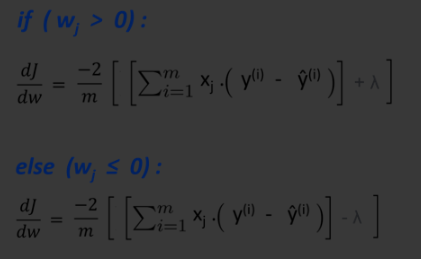

Gradient for Bias

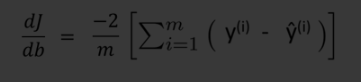

Importing the Dependencies

In [1]:
import numpy as np

Lasso Regression

In [110]:
#creating class for lasso regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

    # fitting the dataset to the model
  def fit(self,X,Y):
      # m --> number of data points --> no. of rows
      # n --> number of input features --> np. of cols
      self.m,self.n = X.shape

      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.Y = Y

      #implementing gradient descent algorithm for optimization
      for i in range(self.no_of_iterations):
        self.update_weights()

      # update weight and bias value
  def update_weights(self):
        # linear equation of the model
        Y_prediction = self.predict(self.X)

        # gradient for weight
        dw = np.zeros(self.n)

        for i in range(self.n):
          if self.w[i]>0:
            dw[i] = (-(2*(self.X[:,i].dot(self.Y - Y_prediction)) + self.lambda_parameter)) / self.m
          else:
            dw[i] = (-(2*(self.X[:,i].dot(self.Y - Y_prediction)) - self.lambda_parameter)) / self.m

        # gradient for bias
        db = -2 * np.sum(self.Y - Y_prediction)/self.m

        # updating the weights and bias
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

  def predict(self,X):
          return X.dot(self.w) + self.b

In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

Data Pre-Processing

In [112]:
salary_data = pd.read_csv("/content/salary_data.csv")

In [113]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [114]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [115]:
salary_data.shape

(30, 2)

In [116]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [117]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

In [118]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [119]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into test and train

In [120]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=2)

Training model

In [121]:
model = Lasso_Regression(learning_rate=0.02,no_of_iterations=1000,lambda_parameter=200)

In [122]:
model.fit(X_train,Y_train)

predict the salary value for test data

In [123]:
test_data_prediction = model.predict(X_test)

In [124]:
print(test_data_prediction)

[36823.89420715 34909.61119552 67452.4223932  59795.29034669
 92338.10154437 81809.54498041]


In [125]:
# R squared error
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error:",score_1)
print("Mean Absolute error:",score_2)

R squared error: 0.8886254959998063
Mean Absolute error: 6804.593468739596


Comparing error with Sklearn Lasso Regression

In [127]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [128]:
sk_model.fit(X_train,Y_train)

Lasso()

In [129]:
sk_test_data_prediction = sk_model.predict(X_test)

In [132]:
# R squared error
score_1_ = metrics.r2_score(Y_test,sk_test_data_prediction)

# mean absolute error
score_2_ = metrics.mean_absolute_error(Y_test,sk_test_data_prediction)

print("R squared error:",score_1_)
print("Mean Absolute Error:",score_2_)

R squared error: 0.8886986575238741
Mean Absolute Error: 6802.695177040222
